# Import important Tools for Project <a class="anchor" id=1>

In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

#from PIL import Image


import numpy as np

import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import time

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,PrecisionRecallDisplay
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.decomposition import PCA

from plotly.subplots import make_subplots

from sklearn.exceptions import ConvergenceWarning 


from imblearn.over_sampling import SMOTE, KMeansSMOTE, BorderlineSMOTE, SVMSMOTE 

import pandas as pd

import warnings

from sklearn.exceptions import UndefinedMetricWarning


from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output()
print()
collect()

ModuleNotFoundError: No module named 'seaborn'

# PIMA-Dataset laden

In [198]:
import pandas as pd

dataset = pd.read_csv('diabetes.csv')

dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Datenanalyse 

In [199]:
# Entsprechende Libs importieren

import numpy as np

import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import skew, kurtosis

# Replace all the NaNs in the dataset with the average or the median of the column
# 1. Nach fehlende und Ungültige Werte prüfung
print('Anzahl fehlende Werte gefunden\n')
print(dataset.isna().sum())


Anzahl fehlende Werte gefunden

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Dataset Informations

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Dataset Decription 

In [139]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Show Mean Median and Mode

In [201]:
def showMeanMedianAndMode(df):
    frame = pd.DataFrame()
    get_num_vals = df.select_dtypes(include=['number'])

    frame['Mean']  = get_num_vals.mean() 
    frame['Median'] = get_num_vals.median()
    frame['Mode']   = get_num_vals.mode().iloc[0]
    frame = frame 

    return frame

showMeanMedianAndMode(dataset.iloc[:,:-1])

,Mean,Median,Mode
Pregnancies,3.845052,3.0000,1.000
Glucose,120.894531,117.0000,99.000
BloodPressure,69.105469,72.0000,70.000
SkinThickness,20.536458,23.0000,0.000
Insulin,79.799479,30.5000,0.000
BMI,31.992578,32.0000,32.000
DiabetesPedigreeFunction,0.471876,0.3725,0.254
Age,33.240885,29.0000,22.000


### Skew

Shows the data values distribution across multiple  features. Positive skew indicate Dataset has a right tail making most datas focused on the left. Negative skew indicates Dataset has a left tail, with data values focusing mainly on the right. Both skew type indicates a assymetrie in the dataset that has to be further adressed.

In [141]:
# Verteilung der Daten prüfen 
print('\nSkewness\n')
print(dataset.skew())


Skewness

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


### Kurtosis


Searches for possible outliers in the dataset.

In [142]:
# Prüfe auf mögliche Ausreißer
print('\nKurtosis\n')
print(dataset.kurtosis())


Kurtosis

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


### Display the distribution of each Feature

Using the knowledge of **skewness** and **kurtosis** to check for the type of dataset presented. This Step is crucial because it gives important knowledge on how the datasets are distributed and therefore making it easier to uses suitable tools for that.

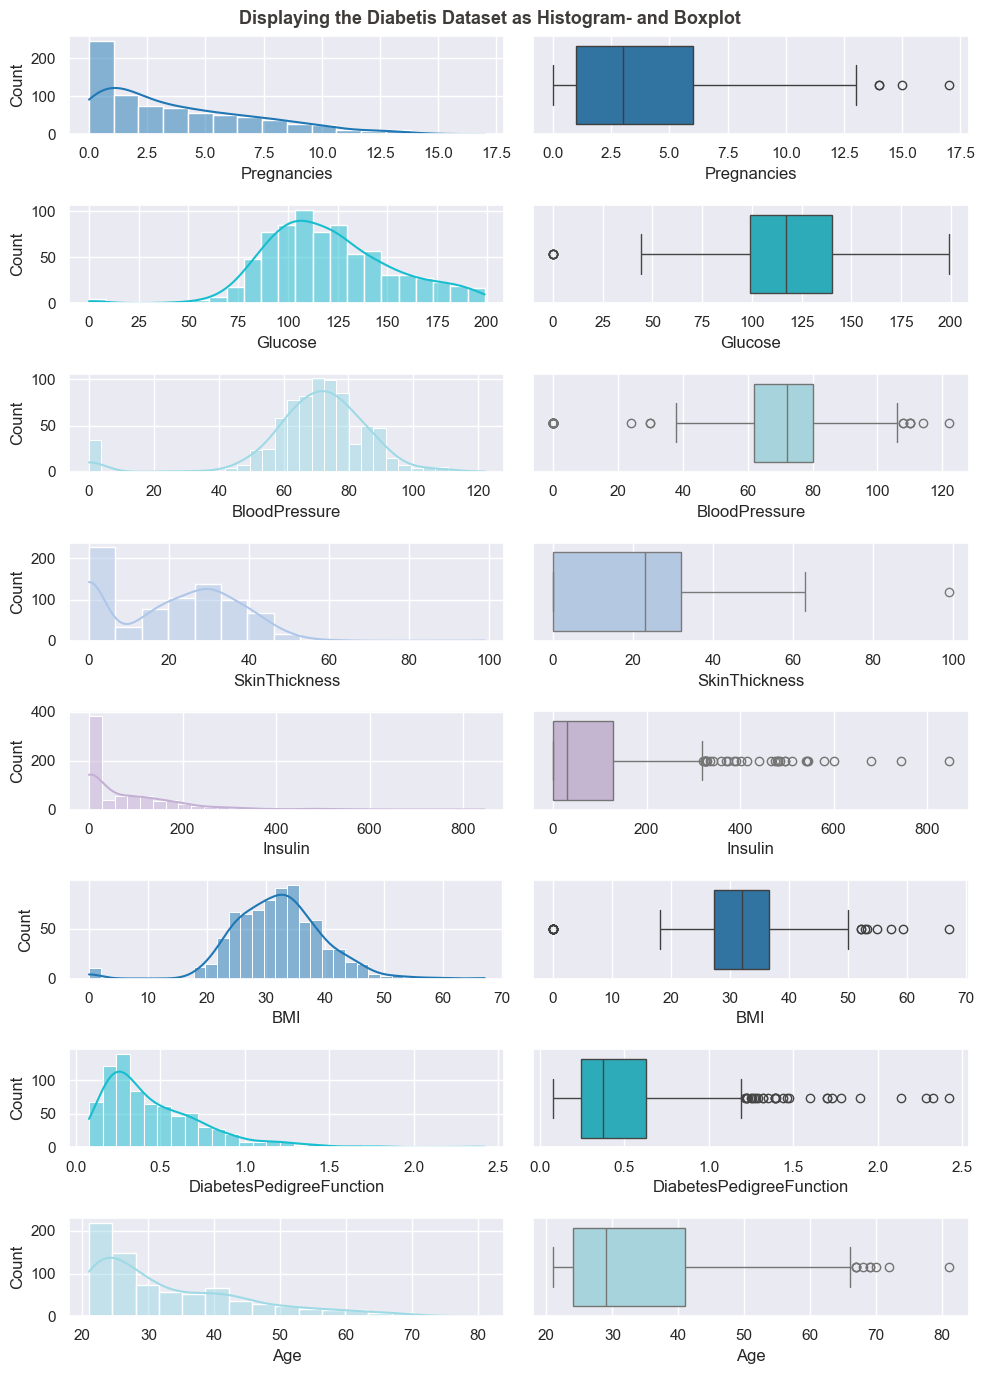

In [143]:
# Custom Colors for Plot
color =  ['#1F77B4', '#17BECF', '#9EDAE5', '#AEC7E8', '#C5B0D5' ]
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# Size of the plots
fig, axs = plt.subplots(8, 2, figsize=(10, 14))
fig.subplots_adjust(top=0.95)
fig.suptitle('Displaying the Diabetis Dataset as Histogram- and Boxplot ', fontweight='bold', fontsize='13', fontfamily='sans-serif', color=black_grad[1])

col = 0
for i, column in enumerate(dataset.columns[:-1] ,0 ):
    sns.histplot(data=dataset, x=dataset[column], kde=True, ax=axs[i, col], color=color[i % len(color)]) 
    col += 1
    sns.boxplot(data=dataset, x=dataset[column], ax=axs[i, col], color=color[i % len(color)])
    col -=1
fig.tight_layout()
plt.show()

### Check for possible Data correlation

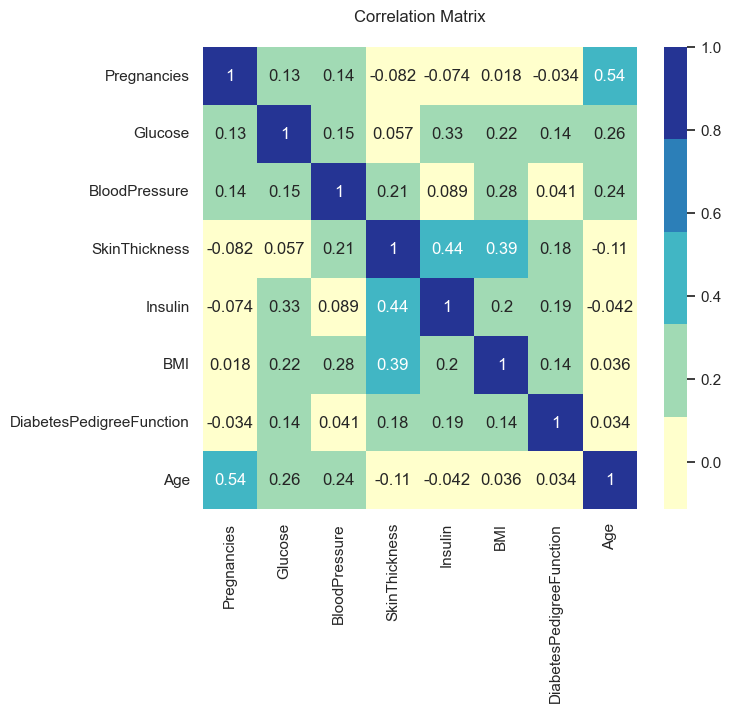

In [144]:
# 3. Nach Korrelation zw. Features prüfen
# Creating a custom color map
#color_list =  ['#1F77B4', '#17BECF', '#9EDAE5', '#AEC7E8', '#C5B0D5']
color_list = ['#FFFFCC', '#A1DAB4', '#41B6C4', '#2C7FB8', '#253494']
# Create correlation matrix for train dataset
plt.figure(figsize=(7, 6))
feature_matrix = dataset.drop(columns=['Outcome'])
sns.heatmap(feature_matrix.corr(), annot=True, cmap=color_list)
plt.title('Correlation Matrix\n')
plt.show()

### Check amount of zeros found in Dataset


In [202]:
# Extract  columns containing zeros other than the column pregnacy. Not every woman has to be pregant to be diabetic

# Other features like skinthickness or age do not conatin zeros hence they were not included 
features =   ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
features_containing_zero = dataset[features] == 0

# Count of zero values
_count = features_containing_zero.sum()
print(f"Count of zeros in each column:\n{_count}")

# Percentage of zero values that might indicate missing data imputation
percentual = ((dataset[features_containing_zero] == 0).sum() / len(dataset) * 100).round(2)
print(f"\nPercentage of zeros:\n{percentual}")

Count of zeros in each column:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Percentage of zeros:
Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64


### Class Imbalance 


Classification for Class 0: 500
Classification for Class 1: 268


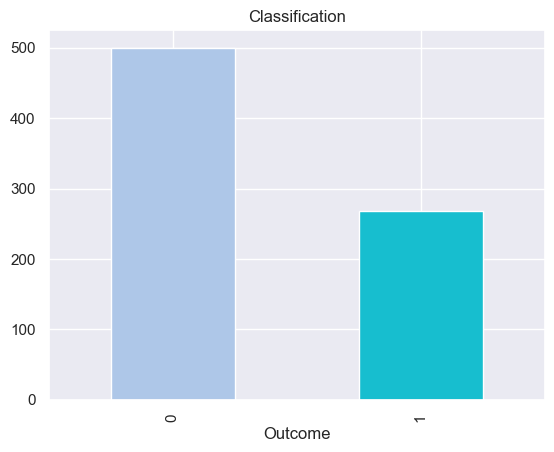

In [203]:
outcome = dataset['Outcome'].value_counts()
print('Classification for Class 0:', outcome[0])
print('Classification for Class 1:', outcome[1])

# Plot Histogram
outcome.plot(kind='bar', title='Classification', color=['#AEC7E8','#17BECF']);

# Useful List and Functions

In [204]:
# Creating custum color pallets

Colors = { 
    'light' : mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#9EDAE5', '#17BECF', '#9EDAE5', '#C5B0D5']),
    'warm' : mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#ADD8E6', '#FFFDD0', '#D2B48C', '#E6E6FA']),
    'cold' : mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#1F77B4', '#17BECF', '#9EDAE5', '#AEC7E8' ]),
    'sunset':  mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#FF7F50', '#FF4500', '#FFD700', '#FF69B4']),
    'forest' : mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#228B22', '#32CD32', '#ADFF2F', '#556B2F']),
    'ocean' : mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#000080', '#0000FF', '#00BFFF', '#87CEEB']),
    'cool_ocean_breeze': mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#1F77B4', '#17BECF', '#9EDAE5', '#AEC7E8', '#C5B0D5']),
    'fall': mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#1F77B4', '#17BECF', '#9EDAE5', '#AEC7E8', '#C5B0D5']),
    'YlGnBu': mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['#FFFFCC', '#A1DAB4', '#41B6C4', '#2C7FB8', '#253494'])
}
Colors


{'light': <matplotlib.colors.LinearSegmentedColormap at 0x21d18a303b0>,
 'warm': <matplotlib.colors.LinearSegmentedColormap at 0x21d19d82540>,
 'cold': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2d460>,
 'sunset': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2d7f0>,
 'forest': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2ede0>,
 'ocean': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2c260>,
 'cool_ocean_breeze': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2e720>,
 'fall': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2f1d0>,
 'YlGnBu': <matplotlib.colors.LinearSegmentedColormap at 0x21d18c2e750>}

## Using Scalers

In [205]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Liste der Skalierer
scalers = {
    'norm': MinMaxScaler(), # For MinMax normalization 
    'standard': StandardScaler(), # For Standardization
    
}
scalers

{'norm': MinMaxScaler(), 'standard': StandardScaler()}

## Changes when using different scaling strategies

### MinMax 

The **MinMaxScaler** scales the values in the dataset between *[0, 1]*. The out put are positive **float** values

In [155]:
# Import usefull functions
import datasetFunctions as dfs

# Use Features to check for missing values 
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

In [212]:

# norm --> normalized Dataset
# '' --> The default dataset is our dataset used earlier

minmaxed_normalize = dfs.CreateDataset().Dataset_types('norm') 
zeros = minmaxed_normalize[features] == 0.

# Count of zero values
_count = zeros.sum()
print(f"Count of zeros in each column:\n{_count}")

# Applying MinMaxScaler
minmaxed_normalize.head()


You chose...MinMaxing...
Count of zeros in each column:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [213]:
# mean median and mode
stats = showMeanMedianAndMode(minmaxed_normalize)
stats

,Mean,Median,Mode
Pregnancies,0.226180,0.176471,0.058824
Glucose,0.607510,0.587940,0.497487
BloodPressure,0.566438,0.590164,0.573770
SkinThickness,0.207439,0.232323,0.000000
Insulin,0.094326,0.036052,0.000000
BMI,0.476790,0.476900,0.476900
DiabetesPedigreeFunction,0.168179,0.125747,0.075149
Age,0.204015,0.133333,0.016667


### Standard Scaler

The **StandardScaler** scales the values in the dataset to have a mean of 0 and a standard deviation of 1. The out put are  positive and negative **float** values

In [214]:
# Standarizing Dataset is meant to remove outliers
standard= dfs.CreateDataset().Dataset_types('standard') 

zeros = standard[features] == 0.

# Count of zero values

_count = zeros.sum()
print(f"Count of zeros in each column:\n{_count}")
standard.head()

You chose...Standardizing...
Count of zeros in each column:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [215]:
# show mean median and mode
stats = showMeanMedianAndMode(standard)
stats

,Mean,Median,Mode
Pregnancies,-8.789266e-17,-0.250952,-0.844885
Glucose,-9.251859e-18,-0.121888,-0.685236
BloodPressure,1.503427e-17,0.149641,0.046245
SkinThickness,8.211024e-17,0.154533,-1.288212
Insulin,-4.972874e-17,-0.428062,-0.692891
BMI,2.960595e-15,0.000942,0.000942
DiabetesPedigreeFunction,1.905883e-15,-0.300128,-0.658012
Age,2.081668e-16,-0.360847,-0.956462


## Effecs using imputation methods


In [216]:
# Import useful libraries
from sklearn.impute import SimpleImputer
from datasetFunctions import CreateDataset

# list of Features to check for zeros in 
features =   ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


# check for features containing zeros   
def get_features_containing_zero(df, features=features):
    """Function for getting features containing
    Args:
    df: DataFrame
    
    Returns:
    DataFrame with features containing zeros as boolean"""

    # List of features to check for zeros

    # Get Features containing zeros
    features_containing_zero = df[features] == 0
    # check for zeros 
    if features_containing_zero.sum().sum() > 0:
        # Print the sum of features containing zeros
        print(f'Features containing zeros:\n{features_containing_zero.sum()}')
        # return true and the boolean values
        return True, features_containing_zero
    else:
        return False, features_containing_zero

# Replace features containing zeros with nan values
def replace_zeros_with_NaNs( features_with_zeros, df):
    """ Replace features containing zeros with nan values
    Args: 
    features_with_zeros
    df: DataFrame
    
    Returns:
    DataFrame with features containing zeros replaced with nan values"""
    # Replace features containing zeros with nan values
    df[features_with_zeros] = df[features_with_zeros].replace(0, np.nan)
    
    return df

# Replace missing values Found in dataset
def replace_missing_values(df, strategy, f=features):
    """Function for replacing missing values
    
    Args:
    df: DataFrame
    strategy: Strategy for imputation
    f: List of features to replace missing values
    
    Returns:
    DataFrame with missing values replaced"""

    # check if dataset contains zeros
    zeros, df_contains_zeros = get_features_containing_zero(df)
    if zeros:
        # Replace zeros with nan values 
        df = replace_zeros_with_NaNs(df_contains_zeros, df)
        # Get the colums without the target class
        features_ = []
        if len(df.columns) > 8:
            features_ = df.iloc[:, :-1]
        else:
            features_ = df.iloc[:, :]

        if strategy == 'mean':
            # Initialize a SimpleImputer with mean strategy
            mean_imputer = SimpleImputer(strategy='mean')
            # Transform the dataset
            imputed_np = mean_imputer.fit_transform(df)
            # Change to pandas Dataframe format
            imputed_np = pd.DataFrame(imputed_np, columns=features_.columns)
            return imputed_np

        elif strategy =='median':
            # Initialize a SimpleImputer with median strategy
            median_imputer = SimpleImputer(strategy='median')
            # Transform the dataset
            imputed_median = median_imputer.fit_transform(df)
            # Change to pandas Dataframe format
            imputed_median = pd.DataFrame(imputed_median, columns=features_.columns)
            return imputed_median
            
        elif strategy =='most_frequent':
            # Initialize a SimpleImputer with most frequent strategy
            most_frequent_imputer = SimpleImputer(strategy='most_frequent')
            # Transform the dataset
            imputed_mf = most_frequent_imputer.fit_transform(df)
            # Change to pandas Dataframe format
            imputed_mf = pd.DataFrame(imputed_mf, columns=features_.columns)
            return imputed_mf
        else:
            raise ValueError('Strategy could not be determined!!! Imputs allowed are most_frequent, mean and median')
    else:
        raise ValueError('No features contain zeros')



## Replacing missing Values with Mean

In [267]:

# dataset copies
mean_dataset = CreateDataset().dataset_copy()

# Imputing missing values with mean
mean_imputed = replace_missing_values(mean_dataset.iloc[:,:-1], 'mean')

mean_imputed.describe()

Features containing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Replacing missing values with Median

In [ ]:
median_dataset = CreateDataset().dataset_copy()
median_imputed = replace_missing_values(median_dataset.iloc[:,:-1],'median')

median_imputed.describe()

Features containing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Replacing missing values with Most Frequent  Values

In [219]:
most_frequent_dataset = CreateDataset().dataset_copy()
most_frequent_imputed = replace_missing_values(most_frequent_dataset.iloc[:,:-1],'most_frequent')
most_frequent_dataset.head()


Features containing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Normalizing Datset of Imputation method


In [220]:
# import important libaries
import datasetFunctions as datfs

### Normalize Imputers using MinMax Scaler

In [221]:
mean_scaled = datfs.CreateDataset(mean_imputed).Dataset_types('norm')
median_scaled = datfs.CreateDataset(median_imputed).Dataset_types('norm')
most_frequent_scaled = datfs.CreateDataset(most_frequent_imputed).Dataset_types('norm')
most_frequent_scaled.head() # <-- Change name here

You chose...MinMaxing...
You chose...MinMaxing...
You chose...MinMaxing...


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.109375,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.109375,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.271739,0.109375,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


### Normalize Imputers using Standard Scaler

In [222]:
s_mean_scaled = datfs.CreateDataset(mean_imputed).Dataset_types('standard')
s_median_scaled = datfs.CreateDataset(median_imputed).Dataset_types('standard')
s_most_frequent_scaled = datfs.CreateDataset(most_frequent_imputed).Dataset_types('standard')
s_most_frequent_scaled.head() # <-- Change name here

You chose...Standardizing...
You chose...Standardizing...
You chose...Standardizing...


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.868403,-0.024430,0.563604,-0.292549,0.167240,0.468492,1.425995
1,-0.844885,-1.199150,-0.520344,-0.112017,-0.292549,-0.851551,-0.365061,-0.190672
2,1.233880,2.017044,-0.685648,0.225793,-0.292549,-1.331838,0.604397,-0.105584
3,-0.844885,-1.067877,-0.520344,-0.787638,-0.416642,-0.633239,-0.920763,-1.041549
4,-1.141852,0.507402,-2.669305,0.563604,0.418170,1.549885,5.484909,-0.020496


# Classifiers

In [225]:
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, RandomizedSearchCV, KFold

In [169]:
Models = {
    'knn': KNeighborsClassifier(),
    'svm': SVC(probability=True), 
    'mlp': MLPClassifier()
}
Models

{'knn': KNeighborsClassifier(),
 'svm': SVC(probability=True),
 'mlp': MLPClassifier()}

# Functions to display type of evaluation Strategy


#### Confusion Matrix

In [317]:
def display_matrix(model, ytest, ypredict, color):
        """Display the confusion matrix
        
        Args:
        
        model: Name of the model
        
        ytest: True labels
        
        ypredict: Predicted labels"""
        cm = confusion_matrix(ytest, ypredict)
        plt.figure(figsize=(5, 2))
        sns.heatmap(cm, annot=True, fmt='d', cmap=color)
        plt.title(f'{model.upper()} Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()   


#### Learning Curve

In [171]:
def display_learning_curve(train_sizes, train_scores, valid_scores ):
    """Display the current learning curve
    
    Args:
    
    train_sizes: List of sizes of training sets
    
    train_scores: List of scores for training
    valid_scores: List of scores"""
    plt.figure(figsize=(5,2))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score') 
    plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation score') 
    plt.xlabel('Training Size') 
    plt.ylabel('Score') 
    plt.title('Learning Curve') 
    plt.legend() 
    plt.show()

#### Recieved Operating Character Area Under the Curve 

In [228]:
def display_roc_auc_curve(y_true, y_proba):
    """Display Roc Auc Curve
    
    Args:
    
    y_true: True labels
    y_proba: predicted labels"""
    # Get probabilits
    
    # Roc Curve und Auc berechenen 
    fpr, tpr, threshold = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 2))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Worst Case') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operation Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

#### Precision Recall curve

In [229]:
def display_precision_recall_curve(model_name,ytest, yscore):
    """Display Precision Recall Curve
    
    Args:
    
    model_name: Name of the model
    ytest: True labels

    yscore: Predicted labels"""
    
    precision, recall, threshold = precision_recall_curve(ytest, yscore)
    pr_auc = auc(precision, recall)
    plt.figure(figsize = (5,2)) 
    plt.plot(recall, precision, color='blue', lw=2, label = 'PR curve (AUC = %0.2f' % pr_auc)
    plt.plot([0, 1], [0.5, 0.5],'k--')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('{} PRC curve'.format(model_name.upper()))
    plt.legend(loc="upper right")
    plt.show()


## Plot Function 

In [231]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
# import ListedColormap

def decision_boundry_show(classifier, xtrain, ytrain, xtest ) :
    """Display decision boundary with PCA
        
        classifier: Trained model
        
        xtest: Test features
        
        ytest: Test labels
        
        """
    pca = PCA(n_components=2)
    xtest_pca = pca.fit_transform(xtest)
    xtrain_pca = pca.transform(xtrain)
    classifier.fit(xtrain_pca, ytrain)
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, xtest_pca, response_method="predict",
        plot_method="pcolormesh",
        alpha=0.5,
    )
    disp.ax_.scatter(xtest_pca[:,0], xtest_pca[:,1], cmap=Colors['YlGnBu'])
    plt.show()

# Preparing Dataset

In [285]:
from sklearn.model_selection import train_test_split
# Dataset 
dataset = pd.read_csv('diabetes.csv')

# Get Features and Labels
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

# Split dataset
Xtrain, Xtestfinal, Ytrain, Ytestfinal = train_test_split(X, y, test_size=0.3, random_state=42)
Xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


## Function for Model Performance

In [311]:

# import time 
from pyexpat import model
import time 
def model_performances(X, y, scorer='accuracy', display_rocCurve=True, k_fold=10):
    """Display model performances
    
    Args:
    
    X: Features
    
    y: Labels
    
    scorer: Scorer to use for performance evaluation default is 'accuracy'"""
    if scorer == 'roc_auc':
        display_rocCurve = False
    
    xtrain, xvalidation, ytrain, yvalidation = train_test_split(X,y, test_size=.3, random_state=42)

    for name, clf in Models.items():
        # Start Timer
        start_time = time.time()
        print(f'\n Classifier {name.upper()}\n')
        ypred = clf.fit(xtrain, ytrain).predict(xvalidation)
        #print(f"Classification report:\n {classification_report(ytestStand, ypred)}")
        print(f' K Fold {k_fold}')
        cv_scores = cross_val_score(clf, xtrain , ytrain, cv=k_fold, scoring=scorer)
        end_time = time.time()
        print(f'\nTime used running: {round(end_time - start_time, 2)} seconds \nScorer used: {scorer}\nModel Perfomance {name.upper()}: {round(np.mean(cv_scores), 2)}') 
        display_matrix(model=name, ytest=yvalidation, ypredict=ypred, color=Colors['cool_ocean_breeze'])
     
        if name == 'svm':
            clf.probaility=False
            yscore = clf.decision_function(xvalidation)
        else:
            clf.probaility=True
            yscore = clf.predict_proba(xvalidation)[:,1]
        if display_rocCurve:
            display_roc_auc_curve(yvalidation, yscore)
    

# Model Performance without scaled data 


 Classifier KNN

 K Fold 10

Time used running: 0.13 seconds 
Scorer used: recall
Model Perfomance KNN: 0.56


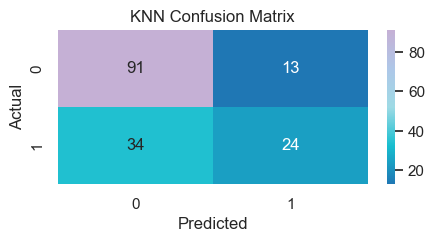

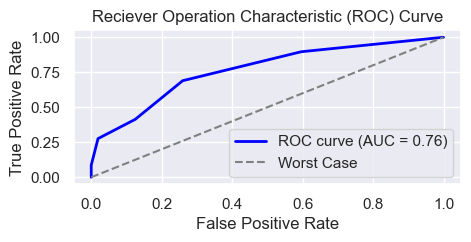


 Classifier SVM

 K Fold 10

Time used running: 0.3 seconds 
Scorer used: recall
Model Perfomance SVM: 0.46


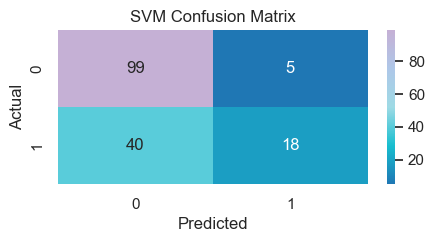

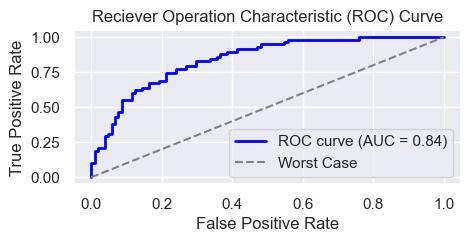


 Classifier MLP

 K Fold 10

Time used running: 2.78 seconds 
Scorer used: recall
Model Perfomance MLP: 0.44


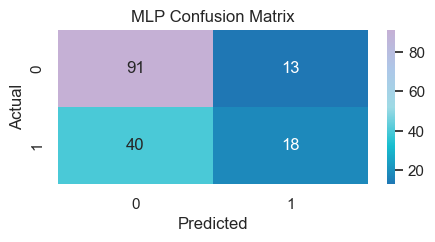

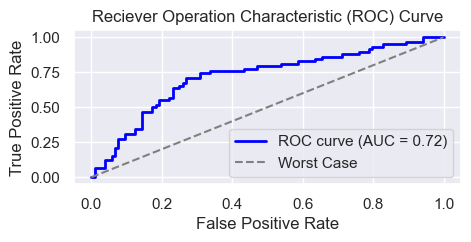

In [318]:

# Show all Model Performances 

model_performances(X=Xtrain, y=Ytrain, scorer='recall') # <-- Change scorer here [precision, recall, roc_auc, f1, accuracy]

# Model Performance with scaled Data

In [181]:
# Import usefull functions
import datasetFunctions as dfs
import pandas as pd
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Model Performances using MinMaxedScaler 

You chose...MinMaxing...

 Classifier KNN

 K Fold 10

Time used running: 0.31 seconds 
Scorer used: recall
Model Perfomance KNN: 0.52


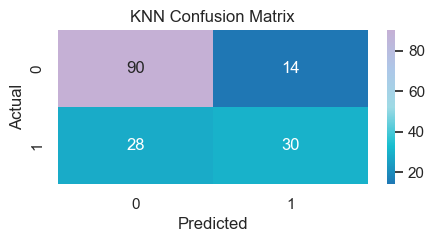

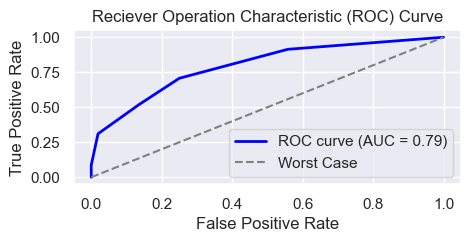


 Classifier SVM

 K Fold 10

Time used running: 0.79 seconds 
Scorer used: recall
Model Perfomance SVM: 0.51


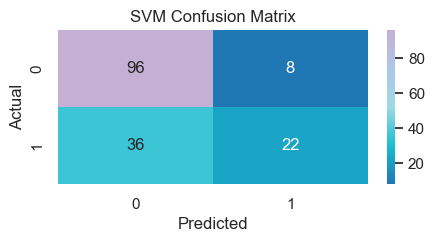

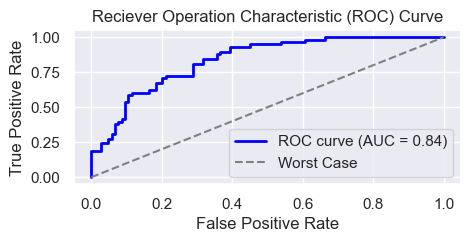


 Classifier MLP

 K Fold 10

Time used running: 7.06 seconds 
Scorer used: recall
Model Perfomance MLP: 0.52


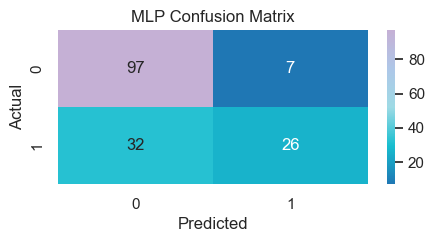

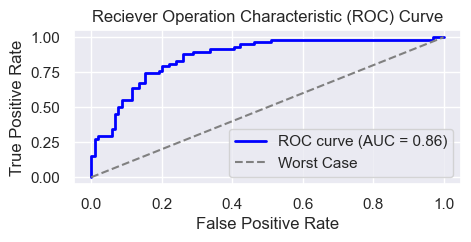

In [182]:
minmaxed = dfs.CreateDataset(Xtrain).Dataset_types('norm') 


xtrainMinMaxed, xtestMinMaxed, ytrainMinMaxed, ytestMinMaxed = train_test_split(minmaxed, Ytrain, test_size=0.3, random_state=42)

scorer = 'recall' #<-- change scorer name here: [accuracy  precision,  recall  roc_auc]

    
model_performances(X=minmaxed, y=Ytrain, scorer=scorer)

### Model Performances using the Z Score function --> StandardScaler

You chose...Standardizing...
Normalized Data with standardScaler

 Classifier KNN

 K Fold 10

Time used running: 0.29 seconds 
Scorer used: recall
Model Perfomance KNN: 0.53


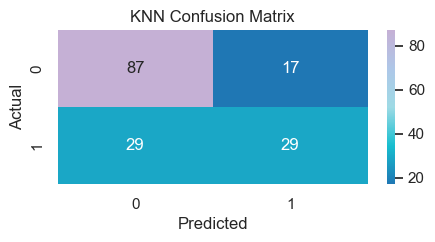

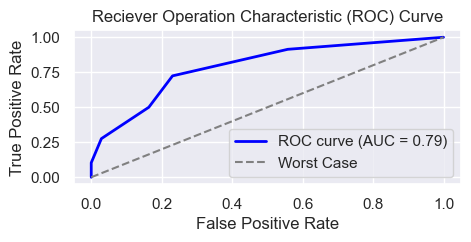


 Classifier SVM

 K Fold 10

Time used running: 0.73 seconds 
Scorer used: recall
Model Perfomance SVM: 0.53


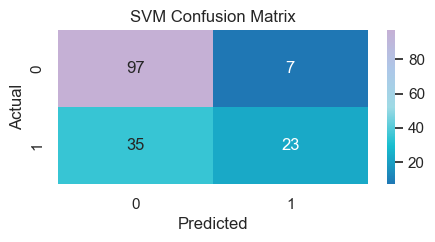

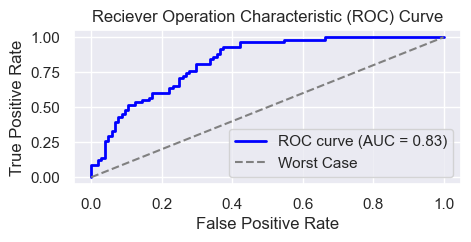


 Classifier MLP

 K Fold 10

Time used running: 6.27 seconds 
Scorer used: recall
Model Perfomance MLP: 0.58


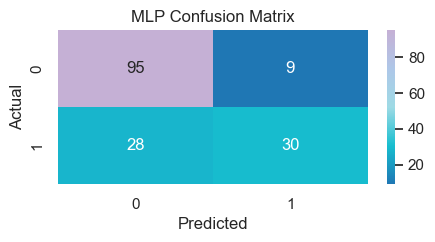

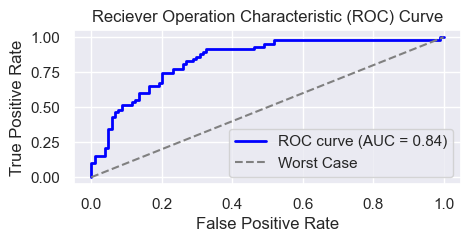

In [183]:
# Standarizing Dataset is meant to remove outliers
standard= dfs.CreateDataset(Xtrain).Dataset_types('standard') 


xtrainStand, xtestStand, ytrainStand, ytestStand = train_test_split(standard, Ytrain, test_size=0.30, random_state=42)

scorer = 'recall' #<-- change scorer name here: [accuracy  precision,  recall  roc_auc]

print('Normalized Data with standardScaler')
model_performances(standard, Ytrain, scorer)

# Model Perfomance with Imputed Data

### Most Frequent Median and Mean


All three Methods showed a significant decrease in performance for all Models. For further analysis, and search of best Model imputed scaled or not will not be considered.

Features containing zeros:
Glucose            4
BloodPressure     13
SkinThickness     99
Insulin          169
BMI                1
dtype: int64

 Classifier KNN

 K Fold 10

Time used running: 0.11 seconds 
Scorer used: recall
Model Perfomance KNN: 0.5


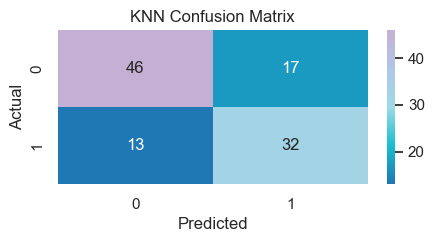

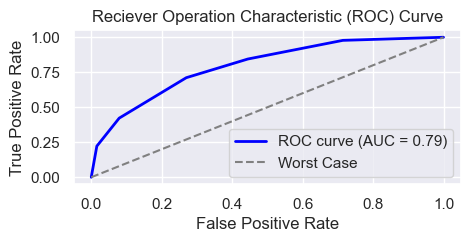


 Classifier SVM

 K Fold 10

Time used running: 0.18 seconds 
Scorer used: recall
Model Perfomance SVM: 0.39


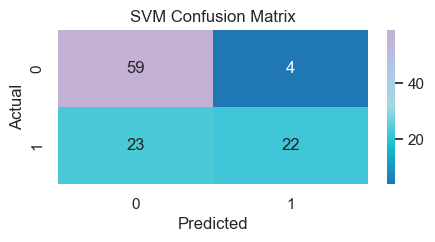

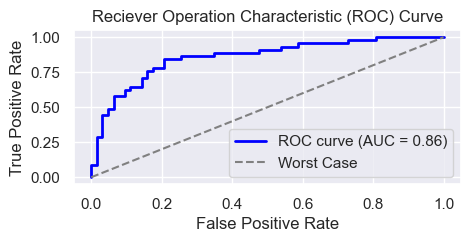


 Classifier MLP

 K Fold 10

Time used running: 2.01 seconds 
Scorer used: recall
Model Perfomance MLP: 0.48


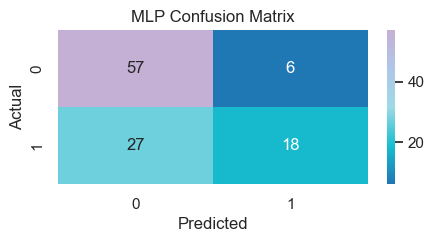

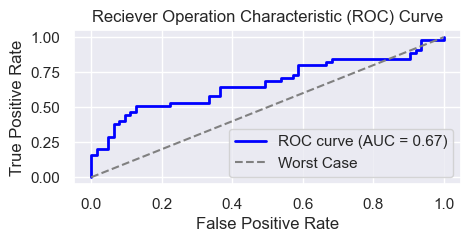

: 

In [ ]:
mfxtrain, mfxtest, mfytrain, mfytest = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)
imputed_x = replace_missing_values(mfxtrain,'mean')  # <-- change strategy here to: mean, median or most_freqent

scorer = 'recall' # <-- change scorer name here [roc_auc, precision, accuracy]

model_performances(X=imputed_x, y=mfytrain, scorer=scorer)
    



# Model Perfomance with imputed scaled Data 

You chose...MinMaxing...
Features containing zeros:
Glucose            4
BloodPressure     13
SkinThickness     99
Insulin          169
BMI                1
dtype: int64

 Classifier KNN

 K Fold 10

Time used running: 0.22 seconds 
Scorer used: recall
Model Perfomance KNN: 0.45


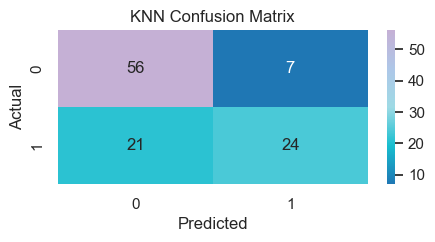

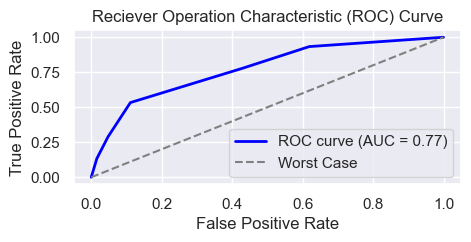


 Classifier SVM

 K Fold 10

Time used running: 0.28 seconds 
Scorer used: recall
Model Perfomance SVM: 0.42


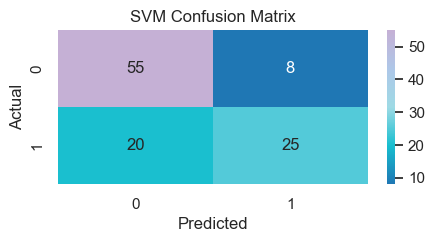

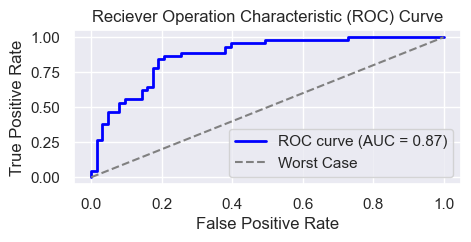


 Classifier MLP

 K Fold 10

Time used running: 3.51 seconds 
Scorer used: recall
Model Perfomance MLP: 0.37


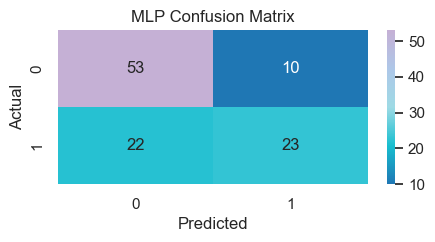

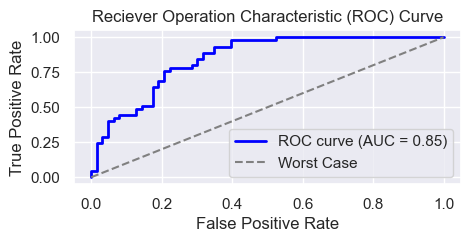

: 

In [ ]:
mfxtrain, mfxtest, mfytrain, mfytest = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

# nomalize using minmax scaler

scaled = dfs.CreateDataset(mfxtrain).Dataset_types('norm') #<--- change [norm , standard]
# replace

imputed_scaled= replace_missing_values(scaled,'most_frequent')  # <-- change stragegy here: [mean, median or most_frequent]

scorer = 'recall' # <-- change scorer name here [roc_auc, precision, accuracy]

model_performances(X=imputed_scaled, y=mfytrain, scorer=scorer)

# Class Imbalance using SMOTE

In [ ]:
# Import smote 
from imblearn.over_sampling import SMOTE, KMeansSMOTE, BorderlineSMOTE, SVMSMOTE 
import time

# Using SMOTE Technique
list_of_smotes = {
    'SMOTE': SMOTE(),
    'Borderline SMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE( random_state=42),
    'KMeans SMOTE': KMeansSMOTE(random_state=42),
}

# Effects of Class Imbalance technique

for name, smote in list_of_smotes.items():
    _, y_res = smote.fit_resample(Xtrain, Ytrain)
    outcome = y_res.value_counts()
    print(f'\nSmote type {name}')
    print('Classification for Class 0:', outcome[0])
    print('Classification for Class 1:', outcome[1])



Smote type SMOTE
Classification for Class 0: 349
Classification for Class 1: 349

Smote type Borderline SMOTE
Classification for Class 0: 349
Classification for Class 1: 349

Smote type SVMSMOTE
Classification for Class 0: 349
Classification for Class 1: 349

Smote type KMeans SMOTE
Classification for Class 0: 349
Classification for Class 1: 351


: 

## Model Perfomance using Class-Imbalance Technique SMOTE

### Datatypes

In [286]:
# Datatypes
normalise_type = {

    'MinMaxed': (xtrainMinMaxed, ytrainMinMaxed, xtestMinMaxed, ytestMinMaxed ),
    'Standard': (xtrainStand, ytrainStand, xtestStand, ytestStand),
    }


### Model Perfomance using Class Imbalance Technique SMOTE

In [ ]:
import time
import numpy as np
from sklearn.model_selection import cross_val_score

def model_performances_with_class_imbalance_technique(scale_type='Standard', scorer='accuracy', roc_auc=True):
    """ 
    Model perfomance using class Imbalance techniques

    Args: 
    scale_type: Type of data to be scaled default is 'Standard'
    scorer: Scorer to use for performance evaluation default is 'accuracy'

    Returns: None

    """
    if scorer=='roc_auc':
        roc_auc = False

    smote_datatype = []
    for name, smote in list_of_smotes.items():
        print(f'\nOversampling with {name.upper()}\n')
        
        # Use normalized data scaled by standard Scaler
        scaled_type_X, scaled_type_y, scaled_type_xtest, scaled_type_ytest = normalise_type[scale_type]
        X_res, y_res = smote.fit_resample(scaled_type_X, scaled_type_y)
        smote_datatype.append((name, X_res, y_res))
        
        print(f'SMOTE Data with {scale_type}')
        
        # Iterate over the Models
        for model_name, clf in Models.items():
            print(f'\nClassifier {model_name.upper()}\n')
            start_time = time.time()
            ypred = clf.fit(X_res, y_res).predict(scaled_type_xtest)
            cv_scores = cross_val_score(clf, X_res, y_res, cv=10, scoring=scorer)
            
            print(f"Time taken: {round(time.time() - start_time, 2)} seconds")
            print(f"Scorer used: {scorer}")
            print(f'Model Performance with {model_name.upper()}: {round(np.mean(cv_scores), 2)}')
            
            display_matrix(model=model_name, ytest=scaled_type_ytest, ypredict=ypred, color=Colors['YlGnBu'])

            if model_name == 'svm':
                clf.probability = False
                yscore = clf.decision_function(scaled_type_xtest)
            else:
                clf.probability = True
                yscore = clf.predict_proba(scaled_type_xtest)[:, 1]
            if roc_auc:
                display_roc_auc_curve(scaled_type_ytest, yscore)



: 


Oversampling with SMOTE

SMOTE Data with Standard

Classifier KNN

Time taken: 0.13 seconds
Scorer used: accuracy
Model Performance with KNN: 0.8


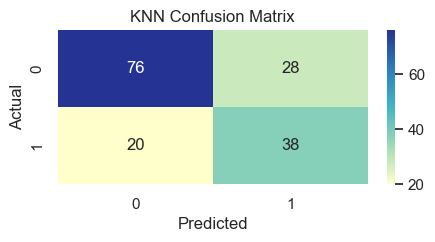


Classifier SVM

Time taken: 0.42 seconds
Scorer used: accuracy
Model Performance with SVM: 0.79


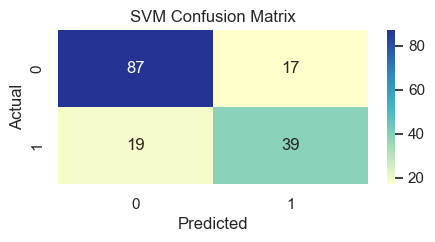


Classifier MLP

Time taken: 3.88 seconds
Scorer used: accuracy
Model Performance with MLP: 0.78


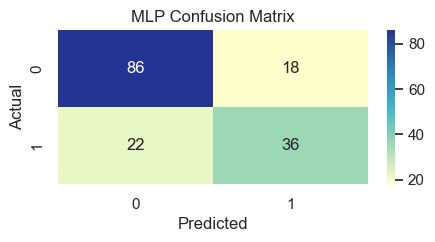


Oversampling with BORDERLINE SMOTE

SMOTE Data with Standard

Classifier KNN

Time taken: 0.12 seconds
Scorer used: accuracy
Model Performance with KNN: 0.78


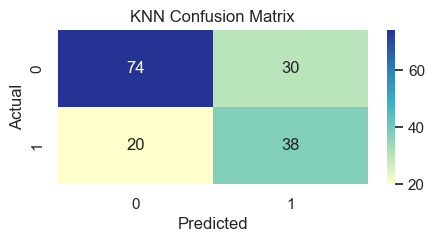


Classifier SVM

Time taken: 0.13 seconds
Scorer used: accuracy
Model Performance with SVM: 0.79


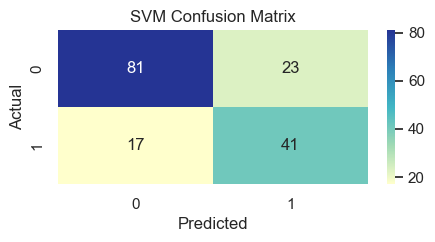


Classifier MLP

Time taken: 3.56 seconds
Scorer used: accuracy
Model Performance with MLP: 0.79


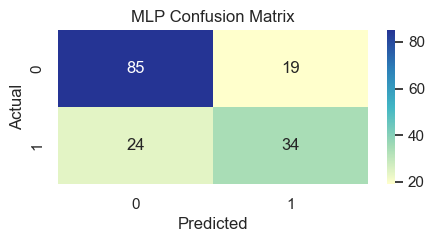


Oversampling with SVMSMOTE

SMOTE Data with Standard

Classifier KNN

Time taken: 0.15 seconds
Scorer used: accuracy
Model Performance with KNN: 0.8


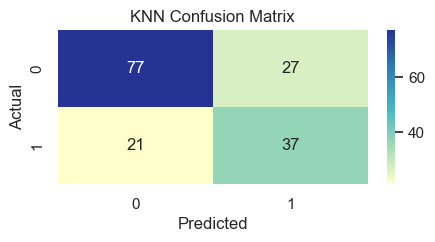


Classifier SVM

Time taken: 0.16 seconds
Scorer used: accuracy
Model Performance with SVM: 0.79


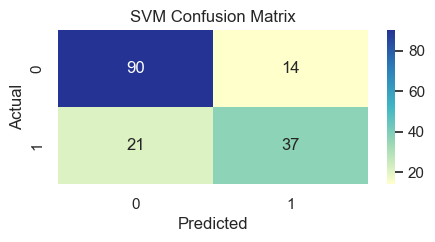


Classifier MLP

Time taken: 3.79 seconds
Scorer used: accuracy
Model Performance with MLP: 0.8


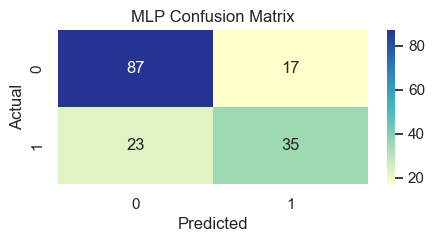


Oversampling with KMEANS SMOTE

SMOTE Data with Standard

Classifier KNN

Time taken: 0.12 seconds
Scorer used: accuracy
Model Performance with KNN: 0.79


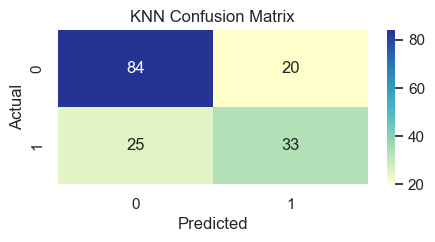


Classifier SVM

Time taken: 0.14 seconds
Scorer used: accuracy
Model Performance with SVM: 0.82


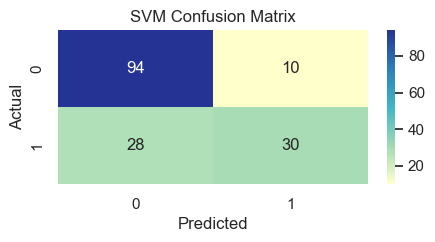


Classifier MLP

Time taken: 3.92 seconds
Scorer used: accuracy
Model Performance with MLP: 0.81


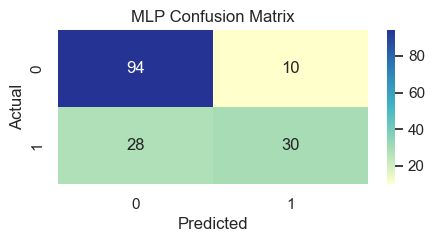

: 

In [ ]:
model_performances_with_class_imbalance_technique(scale_type='Standard', roc_auc=False)

# Searching for best Parameters and Best Models

In this following section we will search for the best parameters and the best models using *GridSearchCV()* and *randomSearchCV()* Functions

## Grid Search and Random Search with Cross validation

In [288]:
from sklearn.inspection import permutation_importance

def search_function_grid_or_random_cv(params, searcher, model_name, X, y, scorer='accuracy', color=Colors['warm'], cross_val=10, n_iter=0.1):
    """Search function for grid or random search with K cross-validation
    
    Args:

    
    searcher (str): Type of search to use. Either 'grid' or 'random'.
    model_name (str): Name of the model to use.
    params (dict): Parameters to search over.
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    
    scorer (str, optional): Scorer to use for scoring. Defaults to 'accuracy'.
    color (str, optional): Color to use for the confusion matrix and ROC AUC. Defaults to 'warm'.
    smoter (str, optional): Type of Data with specific smoter name by user. Defaults to 'Kmeans SMOTE'.
    cross_val (int, optional): Number of cross-validation folds. Defaults to 10.
    n_iter (float, optional): Number of iterations for random search. Defaults to 0.5.
    
    Returns:

    dict: Returns a dictionary containing the best parameters, the best score, and the confusion matrix and ROC AUC.
    best_parameters: The best parameters
    """
    print(f'{searcher.upper()}SearchCV')

    # Get Model
    clf = Models[model_name]
    
    # Split Dataset
    xtrain, xvalidation, ytrain, yvalidation = train_test_split(X, y, test_size=0.3, random_state=42)
    
    if searcher == 'grid':
        # Initialize the GridSearchCV object
        search = GridSearchCV(clf, params, scoring=scorer, cv=cross_val)
        start_time = time.time()
        search.fit(xtrain, ytrain)
        print(f"Time taken: {round(time.time() - start_time, 2)} seconds")


    elif searcher == 'random':
        iter = int(n_iter * 10 )
        print(f"Iterations: {iter}")

        # Initialize the RandomizedSearchCV object
        search = RandomizedSearchCV(clf, param_distributions=params, scoring=scorer, cv=cross_val, n_iter=iter, n_jobs=-1)
        
        # Fit the RandomizedSearchCV object
        start_time = time.time()
        search.fit(xtrain, ytrain)
        total_time = round(time.time() - start_time, 2)
        print(f"Time taken: {round(total_time, 2)} seconds")

    else:
        raise ValueError("searcher should be either 'grid' or 'random'")
    
    # Show best parameters and score
    if model_name == 'svm':
        
        yscore = search.decision_function(xvalidation)
    else:
        yscore = search.predict_proba(xvalidation)[:,1]
    
    # Show best parameters and score
    print(f'Best parameters: {search.best_params_}')
    # show scorer used
    print(f'Scorer used: {scorer.upper()}')
    print(f'Training Score: {round(search.score(xtrain, ytrain), 2)}')
    print(f'Test Score: {round(search.score(xvalidation, yvalidation), 2)}')
    print(f'Best Score: {round(search.best_score_, 2)}')

    # Display confusion matrix
    display_matrix(model=model_name, ytest=yvalidation, ypredict=search.predict(xvalidation), color=color)
    
    # Display model's performance to differentiate between classes
    display_roc_auc_curve(yvalidation, yscore)



    # Return best parameters 
    return search.best_params_


In [ ]:
# Function search for smote datatype

def create_list_of_smote_datatypes(norm_type):
    """Creates a list of tuples containing the name of the smote datatype and the X,y data"""
    X, y, xtest, ytest = normalise_type[norm_type]
    return [(name, *smote.fit_resample(X, y)) for name, smote in list_of_smotes.items()]

def search_for_smote_dataset(smoter='KMeans SMOTE', data_type='Standard'):
    """Search for smote datatype

    Args:
        smoter (str, optional): Type of Data with specific smoter name by user. Defaults to 'Kmeans SMOTE'.

    Returns:
        tuple: Returns a tuple containing the name and the X,y data for given smoter
    """
    smote_datatype = create_list_of_smote_datatypes(norm_type=data_type)
    for name, xres, yres in smote_datatype:
        if name == smoter:
            return (name, xres, yres)
        
# Shows the list of Smote Names when searching for best datasets

smote_names = [name for name, _ in list_of_smotes.items()]
smote_names.append(name)
smote_names

['SMOTE', 'Borderline SMOTE', 'SVMSMOTE', 'KMeans SMOTE', 'KMeans SMOTE']

## Hyperparameter Tuning with Random & Grid Search using K Cross Validation 

#### KNearest Neighbors

SMOTE used: KMEANS SMOTE


KNEAREST NEIGHBORS

GRIDSearchCV
Time taken: 1.69 seconds
Best parameters: {'metric': 'euclidean', 'n_neighbors': np.int64(7), 'weights': 'uniform'}
Scorer used: ACCURACY
Training Score: 0.85
Test Score: 0.79
Best Score: 0.82


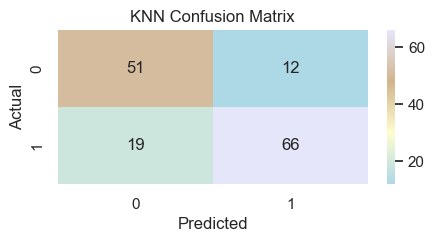

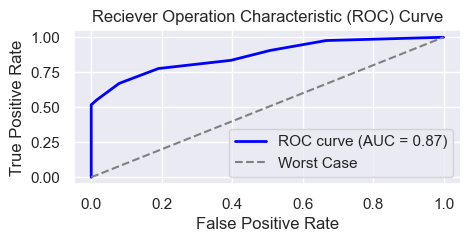

In [289]:

# Get Dataset
name, Xres, Yres = search_for_smote_dataset() # Default is the KMeans SMOTE dataset because all models perform the best with this dataset
# Print SMOTER Used in this Training

print(f'SMOTE used: {name.upper()}\n')

knn = 'KNearest Neighbors'
# Define the hyperparameter grid
knn_grid = {
    'n_neighbors': np.arange(1, 9, 2), # z.B. [1,3,5,7],
    'metric': ['euclidean', 'manhattan', 'minkowski'],     
    'weights': ['uniform', 'distance'],
}
print(f'\n{knn.upper()}\n')


knn_best_params = search_function_grid_or_random_cv(searcher='grid', model_name='knn', scorer='accuracy', X=Xres, y=Yres, params=knn_grid , n_iter=(24 * 0.25)) # Default 10 Fold Cross validation


### Support Vector Machine 


SUPPORT VECTOR MACHINE

SMOTE used: KMEANS SMOTE

GRIDSearchCV
Time taken: 3.49 seconds
Best parameters: {'C': np.float64(1.2915496650148828), 'kernel': 'linear'}
Scorer used: ACCURACY
Training Score: 0.84
Test Score: 0.81
Best Score: 0.83


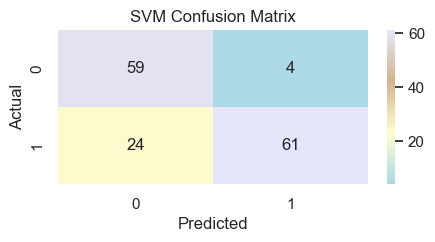

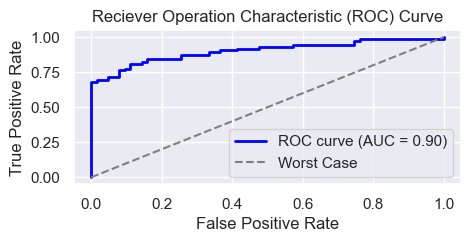

In [290]:

svm = 'Support Vector Machine'
# Hyperparameter für SVM festlegen
svm_grid = {
    'kernel': ['linear', 'rbf'], 
    'C': np.logspace(-3, 1, 10), 
}


# Get Dataset
name, Xres, Yres = search_for_smote_dataset() # Default is the KMeans SMOTE dataset because all models perform best with this dataset
# Print SMOTER Used in this Training
print(f'\n{svm.upper()}\n')

print(f'SMOTE used: {name.upper()}\n')

svm_best_params = search_function_grid_or_random_cv(searcher='grid', model_name='svm', scorer='accuracy',X=Xres, y=Yres, params=svm_grid , n_iter=(18 * 0.25)) # Default 10 Fold Cross validation


### Multi Layer Perceptron


NEURAL NETWORK CLASSIFIER

SMOTE used: KMEANS SMOTE

RANDOMSearchCV
Iterations: 57
Time taken: 146.25 seconds
Best parameters: {'solver': 'lbfgs', 'max_iter': 1000, 'learning_rate_init': np.float64(0.007), 'hidden_layer_sizes': (50, 50), 'alpha': np.float64(0.0051), 'activation': 'relu'}
Scorer used: ACCURACY
Training Score: 1.0
Test Score: 0.8
Best Score: 0.83


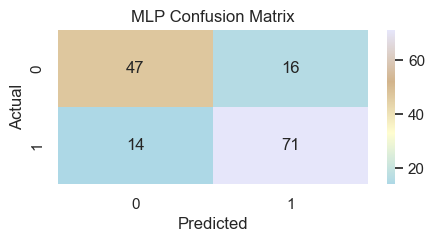

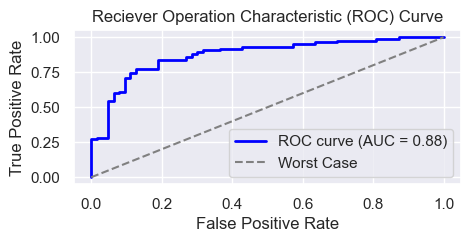

In [283]:
mlp = 'Neural Network Classifier'
# Hyperparameter für Neural Network Classifier festlegen
mlp_grid = {
        'hidden_layer_sizes': [(50, 50), (100, 100), (100, 50), (50, 100)],
        'alpha': np.arange(0.0001, 0.01, 0.001),
        'solver': ['adam', 'lbfgs'], 
        'activation': ['relu', 'logistic', 'sigmoid', 'tangh'], 
        'max_iter': [1000],
        'learning_rate_init': np.arange(0.001, 0.01, 0.001)

}


# Get Dataset
name, Xres, Yres = search_for_smote_dataset(data_type='Standard') # Default is the KMeans SMOTE dataset because all models perform the best with this dataset
print(f'\n{mlp.upper()}\n')

# Print SMOTER Used in this Training
print(f'SMOTE used: {name.upper()}\n')
mlp_best_params = search_function_grid_or_random_cv(searcher='random', model_name='mlp', scorer='accuracy', X=Xres, y=Yres, params=mlp_grid , n_iter=(23 * 0.25)) # Default 10 Fold Cross validation


In [ ]:
from sklearn.inspection import permutation_importance



# Frame Work Model Pipeline 

In [284]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

# Creating List of Pipline models and initializing them with the best Parameters found 
KNN = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(**knn_best_params),
   
    )
   
SVM = make_pipeline(
    StandardScaler(),
    SVC(probability=True, **svm_best_params),
   
)    

MLP = make_pipeline(
    StandardScaler(),
    MLPClassifier( **mlp_best_params),   
    
)

Pipeline_Models = {
    'KNN': KNN,
    'SVM': SVM,
    'MLP': MLP,}

Pipeline_Models 

{'KNN': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier',
                  KNeighborsClassifier(metric='euclidean',
                                       n_neighbors=np.int64(1)))]),
 'SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=np.float64(10.0), probability=True))]),
 'MLP': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(alpha=np.float64(0.0051),
                                hidden_layer_sizes=(50, 50),
                                learning_rate_init=np.float64(0.007),
                                max_iter=1000, solver='lbfgs'))])}

## Compare Models


In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
model_comparison = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'AucRoc': []
}

for model_name, model in Pipeline_Models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtestfinal)
    y_pred_proba = model.predict_proba(Xtestfinal)[:, 1] if hasattr(model, "predict_proba") else [0] * len(Ytestfinal)

    accuracy = accuracy_score(Ytestfinal, y_pred)
    precision = precision_score(Ytestfinal, y_pred)
    recall = recall_score(Ytestfinal, y_pred)
    auc_roc = roc_auc_score(Ytestfinal, y_pred_proba)

    model_comparison['Model'].append(model_name)
    model_comparison['Accuracy'].append(accuracy)
    model_comparison['Precision'].append(precision)
    model_comparison['Recall'].append(recall)
    model_comparison['AucRoc'].append(auc_roc)

comparison_df = pd.DataFrame(model_comparison)
print("\nModel Comparison Table:")
comparison_df


Training and evaluating KNN...
Training and evaluating SVM...
Training and evaluating MLP...

Model Comparison Table:


,Model,Accuracy,Precision,Recall,AucRoc
0,KNN,0.636364,0.475000,0.4750,0.598427
1,SVM,0.718615,0.600000,0.5625,0.756374
2,MLP,0.731602,0.595745,0.7000,0.754719


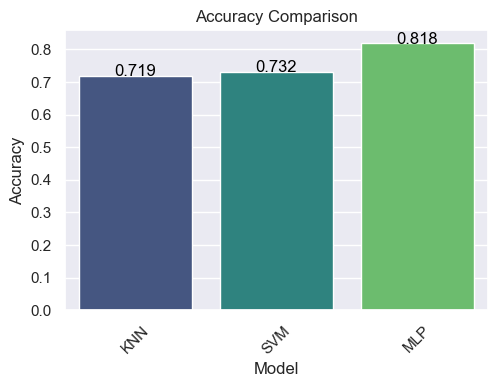

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)

#  Accuracy values on the Bar
for index, row in comparison_df.iterrows():
    plt.text(row.name, row.Accuracy, round(row.Accuracy, 3), color='black', ha="center")



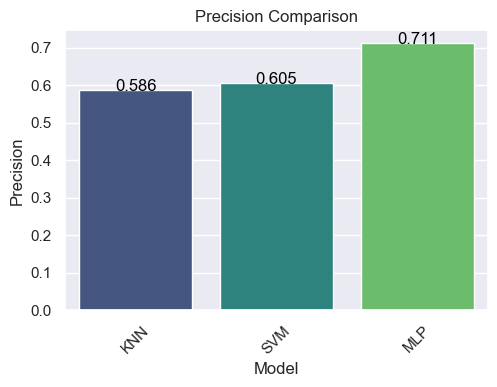

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Precision', data=comparison_df, palette='viridis')
plt.title('Precision Comparison')
plt.xticks(rotation=45)
#  Precision values on the Bar
for index, row in comparison_df.iterrows():
    plt.text(row.name, row.Precision, round(row.Precision, 3), color='black', ha="center")

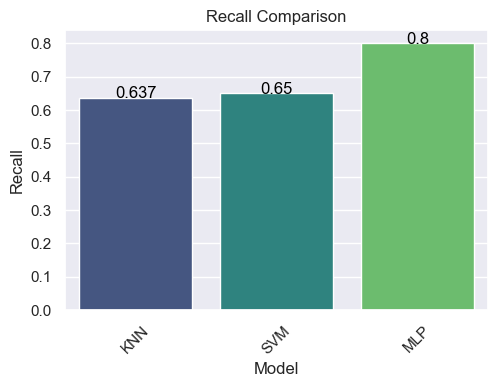

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Recall', data=comparison_df, palette='viridis')
plt.title('Recall Comparison')
plt.xticks(rotation=45)

#  Accuracy values on the Bar
for index, row in comparison_df.iterrows():
    plt.text(row.name, row.Recall, round(row.Recall, 3), color='black', ha="center")

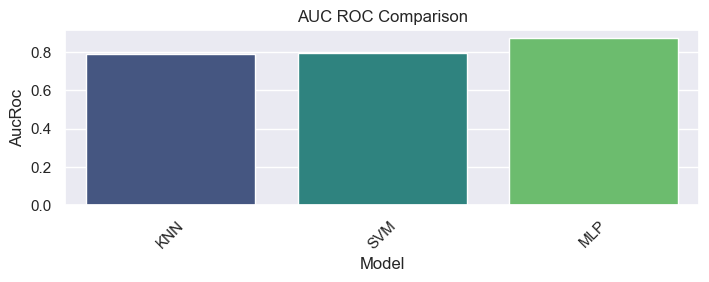

: 

: 

: 

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='AucRoc', data=comparison_df, palette='viridis')
plt.title('AUC ROC Comparison')
plt.xticks(rotation=45)
plt.show()

# #  Accuracy values on the Bar
# for index, row in comparison_df.iterrows():
#     plt.text(row.name, row.AucRoc, round(row.AucRoc, 3), color='black', ha="center")

# Ensemble Method with all three Classifier using Classimbalance Technique

In [296]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# read in diabetes file

diabetes = pd.read_csv('diabetes.csv')
eval_list = []

# create X and y

X = diabetes.iloc[:,:-1]
y = diabetes['Outcome']


# Class Imbalance technique KMeans Smote

smote = KMeansSMOTE(random_state=42)



# Splitting the dataset into training set and test set
Xtrain, Xtestfinal, Ytrain, Ytestfinal = train_test_split(X, y, test_size=0.3, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

xtrain, xvalidation, ytrain, yvalidation = train_test_split(X_res, y_res, test_size=0.30, random_state=42)


xtrain_not_sm, Xtest_not_mod, ytrain_not_mod, Ytest_not_mod = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling
sc =  StandardScaler()

xtrain_sm = sc.fit_transform(xtrain)
xtrain_not_mod = sc.fit_transform(xtrain_not_sm)


Xtestfinal = sc.fit_transform(Xtestfinal)




# # Ensemble Method with all three Classifier
# Models use the best Hyperparameter
ensemble_model_modified = VotingClassifier(estimators=[
    ('knn', KNN),
    ('svm', SVM),
    ('mlp', MLP)], voting='hard', verbose=True, n_jobs=-1)




# Ensemble Method Modified with Hyperparameters with Class Imbalance Technique
start_time_mod = time.time()
ensemble_model_modified.fit_transform(xtrain_sm, ytrain)
ypred = ensemble_model_modified.predict(Xtestfinal)
end_time_mod = time.time()
total_time_mod = end_time_mod - start_time_mod


eval_list.append(('Ensemble Model Modified',accuracy_score(Ytestfinal, ypred), 
                                            precision_score(Ytestfinal, ypred), 
                                            recall_score(Ytestfinal, ypred), 
                                            
                                            ensemble_model_modified.score(xtrain_sm, ytrain),
                                            ensemble_model_modified.score(Xtestfinal, Ytestfinal),
                                            
                                            'KMeansSMOTE', 
                                             'StandardScaler', 
                                             total_time_mod,
                                            ))



# KNN

start_time_knn = time.time()
KNN.fit(xtrain_sm, ytrain)
ypred_knn = KNN.predict(Xtestfinal)
end_time_knn = time.time()
total_time_knn = end_time_knn - start_time_knn

eval_list.append(('KNearest Neighbor' ,accuracy_score(Ytestfinal, ypred_knn), 
                                            precision_score(Ytestfinal, ypred_knn), 
                                            recall_score(Ytestfinal, ypred_knn), 
                                            
                                            KNN.score(xtrain_sm, ytrain),
                                           KNN.score(Xtestfinal, Ytestfinal),
                                            
                                            'KMeansSMOTE', 
                                             'StandardScaler', 
                                             total_time_knn, ))

# SVM

start_time_svm = time.time()
SVM.fit(xtrain_sm, ytrain)
ypred_svm = SVM.predict(Xtestfinal)
end_time_svm = time.time()
total_time_svm = end_time_svm - start_time_svm


eval_list.append(('Support Vector Machine', accuracy_score(Ytestfinal, ypred_svm), 
                                            precision_score(Ytestfinal, ypred_svm), 
                                            recall_score(Ytestfinal, ypred_svm),
                                            
                                            SVM.score(xtrain_sm, ytrain),
                                             SVM.score(Xtestfinal, Ytestfinal),
                                             'KMeansSMOTE', 
                                             'StandardScaler', 
                                             total_time_svm, ))


# MLP

start_time_mlp = time.time()
MLP.fit(xtrain_sm, ytrain)
ypred_mlp = MLP.predict(Xtestfinal)
end_time_mlp = time.time()
total_time_mlp = end_time_mlp - start_time_mlp


eval_list.append(('Multi-layer Perceptron', accuracy_score(Ytestfinal, ypred_mlp), 
                                            precision_score(Ytestfinal, ypred_mlp), 
                                            recall_score(Ytestfinal, ypred_mlp),
                                            
                                            MLP.score(xtrain_sm, ytrain),
                                             MLP.score(Xtestfinal, Ytestfinal),
                                             'KMeansSMOTE', 
                                             'StandardScaler', 
                                             total_time_mlp, ))



df_eval = pd.DataFrame(eval_list, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'Training Score', 'Test Score', 'Class Imbalance Technic', 'Scaler', 'Total Time',
    ])



# show the results
df_eval

,Model,Accuracy,Precision,Recall,Training Score,Test Score,Class Imbalance Technic,Scaler,Total Time
0,Ensemble Model Modified,0.800866,0.680851,0.8000,1.000000,0.800866,KMeansSMOTE,StandardScaler,0.570219
1,KNearest Neighbor,0.818182,0.706522,0.8125,1.000000,0.818182,KMeansSMOTE,StandardScaler,0.007887
2,Support Vector Machine,0.787879,0.663158,0.7875,0.915835,0.787879,KMeansSMOTE,StandardScaler,0.083270
3,Multi-layer Perceptron,0.800866,0.666667,0.8500,1.000000,0.800866,KMeansSMOTE,StandardScaler,0.756146


# Confusionsmatrix der Modelle

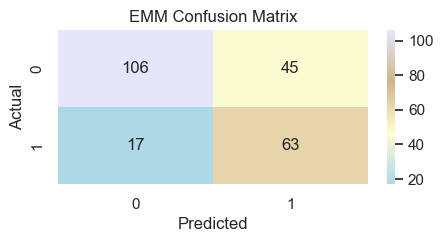

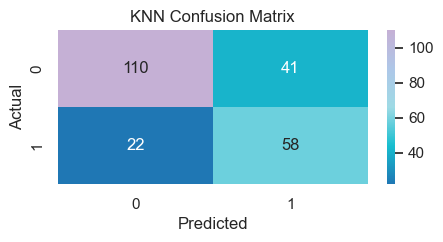

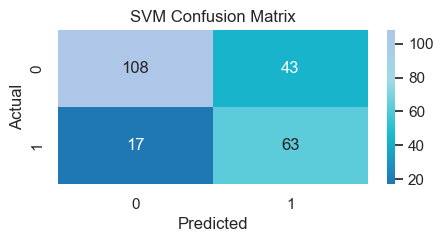

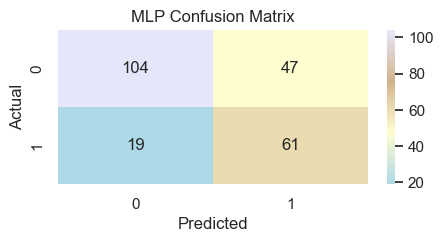

In [263]:
display_matrix(model='EMM', ytest=Ytestfinal, ypredict=ypred, color=Colors['warm'])
display_matrix(model='KNN', ytest=Ytestfinal, ypredict=ypred_knn, color=Colors['fall'])
display_matrix(model='svm', ytest=Ytestfinal, ypredict=ypred_svm, color=Colors['cold'])
display_matrix(model='mlp', ytest=Ytestfinal ,ypredict=ypred_mlp, color=Colors['warm'])

